### Clase 07
- El método **groupby** nos permite agrupar por una o más categorías y posteriomente aplicar una función de resumen por ejemplo (media, mediana, moda, max min).
- Operaciones con strings
```
    upper()
    lower()
    len()
    startswith('G')
    contains(pat = 'Bill.', regex = True)
```

In [1]:
import pandas as pd

### 1) Levantar el dataset de titanic

In [2]:
# Construcción del dataframe desde una URL
url = "https://raw.githubusercontent.com/xlisouski/DataCoder/main/Titanic.csv"
df = pd.read_csv(url)

#### 2) Explorar contenido usando métodos head(), info() y describe()

In [3]:
df.shape

(891, 12)

In [4]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
# Listado de todas las columnas, tipo de datos y cantidad de no-nulos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
# Resumen estadistico de las columnas numericas
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


#### 3) Completar valores vacíos del campo "edad" con la mediana

In [7]:
# Calcula la mediana de la columna "Age"
age_mediana = df["Age"].median()

In [8]:
# Reemplar los NaN con la mediana calculada en el paso anterior
df["Age"].fillna(value=age_mediana, inplace=True)

In [9]:
# Verificamos nuevamente, Age ya cuenta con 891 valores non-null
# df.info()
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

#### 4) Calcular la edad promedio según sexo, ¿Hay diferencias?

In [10]:
# Agrupamos por la columna Sex y sacamos el promedio de la edad
edad_promedo_sexo = df.groupby("Sex")["Age"].mean()

In [11]:
# Redondeamos, y podemos ver que en promedio los pasajeros hombres, son mayores que las mujeres
edad_promedo_sexo.round(0)

Sex
female    28.0
male      30.0
Name: Age, dtype: float64

#### 5) Generar una variable booleana que indique True si el nombre de la persona contiene el string "Master."

In [12]:
# Creamos una columna, en base a la condición si la columna Name contiene "Master."
df["IsMaster"] = df["Name"].str.contains("Master.")

In [13]:
# Filtramos los primeros cinco resultados donde la columna IsMater sea True
df[df["IsMaster"]].head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,IsMaster
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,True
16,17,0,3,"Rice, Master. Eugene",male,2.0,4,1,382652,29.1250,NaN,Q,True
50,51,0,3,"Panula, Master. Juha Niilo",male,7.0,4,1,3101295,39.6875,NaN,S,True
59,60,0,3,"Goodwin, Master. William Frederick",male,11.0,5,2,CA 2144,46.9000,NaN,S,True
63,64,0,3,"Skoog, Master. Harald",male,4.0,3,2,347088,27.9000,NaN,S,True


#### 6) Agrupar por esa variable y calcular el porcentaje de supervivientes en cada caso. ¿Hay diferencias?, ¿Y agrupando también por sexo?

In [14]:
# Agrupamos por la columna IsMaster y calculamos el porcentaje de supervivientes
sobrevivientes_is_master = df.groupby("IsMaster")["Survived"].mean()
print("Porcentaje de supervivientes agrupados si son 'Master.':")
print(sobrevivientes_is_master.round(2))

Porcentaje de supervivientes agrupados si son 'Master.':
IsMaster
False    0.37
True     0.57
Name: Survived, dtype: float64


In [15]:
# Agrupamos por la columna IsMaster y Sex, y calculamos el porcentaje
sobrevivientes_is_master_by_sex = df.groupby(["Sex", "IsMaster"])["Survived"].mean()
print("\nPorcentaje de supervivientes agrupados si son 'Master.' y por genero:")
print(sobrevivientes_is_master_by_sex.round(2))


Porcentaje de supervivientes agrupados si son 'Master.' y por genero:
Sex     IsMaster
female  False       0.74
male    False       0.16
        True        0.57
Name: Survived, dtype: float64


---
### Hand on lab

Creación de gráficos con Matplotlib
- ¿De qué manera?
- Con el dataset de titanic levantado al comienzo de la clase, pensar en qué circunstancias podrían usar cada tipo de gráfico y programarlo. 
- Por ejemplo, boxplot con eje Y edad y eje X el sexo para ver diferencias de distribuciones.


In [23]:
import matplotlib as mpl
import matplotlib.pyplot as plt

#### 1) Diagrama de barras - Supervivientes por clase

In [72]:
# Diagrama de barras - Supervivientes por clase
sobrevivientes_by_class = df.groupby("Pclass")[
    "Survived"
].mean()  # Calculamos el promedio de sobrevivientes por clase
print(sobrevivientes_by_class.round(4) * 100)  # Redondeamos

Pclass
1    62.96
2    47.28
3    24.24
Name: Survived, dtype: float64


In [73]:
# El objeto es una serie de pandas, lo necesitamos como lista
print(type(sobrevivientes_by_class))

# Convertimos el contenido a lista
clases = [str(x) for x in sobrevivientes_by_class.index.tolist()]
sobrevivientes_by_class_rate = sobrevivientes_by_class.values
print(clases)  # Lista de las clases por categoria, 1: Primera, 2: Segunda, 3: Tercera
print(sobrevivientes_by_class_rate)  # Porcentajes por clase

<class 'pandas.core.series.Series'>
['1', '2', '3']
[0.62962963 0.47282609 0.24236253]


Text(0.5, 0, 'Clase del Pasajero')

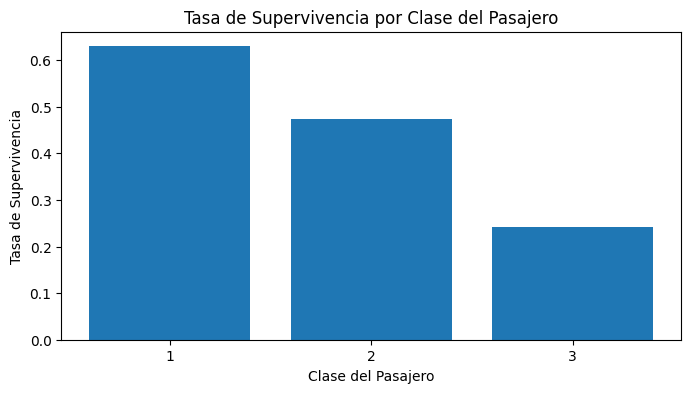

In [42]:
# Graficamos las barras
fig, ax = plt.subplots(figsize=(8, 4))
ax.bar(clases, sobrevivientes_by_class_rate)
ax.set_title("Tasa de Supervivencia por Clase del Pasajero")
ax.set_ylabel("Tasa de Supervivencia")
ax.set_xlabel("Clase del Pasajero")

---
#### 2) Histograma de edades de los sobrevivientes

In [79]:
# Filtramos los que sobrevivieron y los que no
# nos quedamos con la columna Age, donde los valores de Survived sean 1
sobrevivio_by_age = df[df["Survived"] == 1]["Age"]
# nos quedamos con la columna Age, donde los valores de Survived sean 0
no_sobrevivio_by_age = df[df["Survived"] == 0]["Age"]

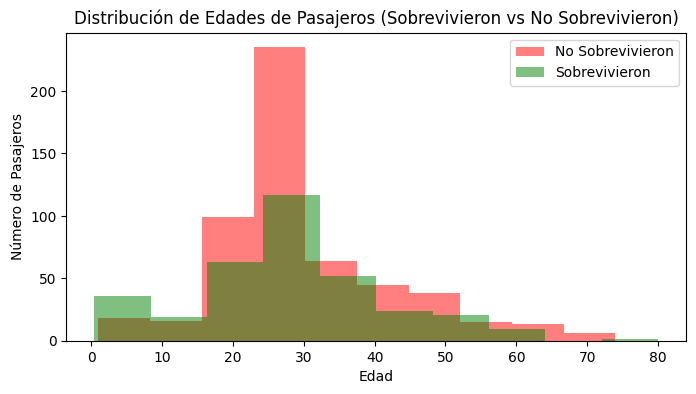

In [60]:
# Graficamos el histograma
fig, ax = plt.subplots(figsize=(8, 4))
ax.hist(no_sobrevivio_by_age, bins=10, alpha=0.5, label="No Sobrevivieron", color="red")
ax.hist(sobrevivio_by_age, bins=10, alpha=0.5, label="Sobrevivieron", color="green")
ax.set_title("Distribución de Edades de Pasajeros (Sobrevivieron vs No Sobrevivieron)")
ax.set_xlabel("Edad")
ax.set_ylabel("Número de Pasajeros")
ax.legend()

---
#### 3) Boxplot de distribución de Edad y Sexo

In [80]:
# Filtramos el sexo
# nos quedamos con la columna Age, donde los valores de Sex sean male
hombres_by_age = df[df["Sex"] == "male"]["Age"]
# nos quedamos con la columna Age, donde los valores de Sex sean female
mujeres_by_age = df[df["Sex"] == "female"]["Age"]

Text(0, 0.5, 'Edad')

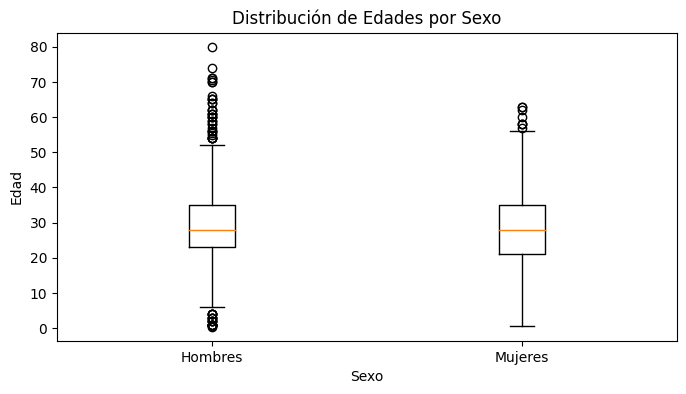

In [77]:
# Graficamos el Boxplot
fig, ax = plt.subplots(figsize=(8, 4))
ax.boxplot([hombres_by_age, mujeres_by_age], labels=["Hombres", "Mujeres"])
ax.set_title("Distribución de Edades por Sexo")
ax.set_xlabel("Sexo")
ax.set_ylabel("Edad")